<a href="https://colab.research.google.com/github/IshanKapadia-Data/Instacart-Market-Basket-Analysis/blob/main/Market_Basket_Analysis_Data_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Description and Analysis

In [ ]:
import pandas as pd
import numpy as np

aisles       = pd.read_csv('aisles.csv')
departments  = pd.read_csv('departments.csv')
products     = pd.read_csv('products.csv')
orders       = pd.read_csv('orders.csv')
prior        = pd.read_csv('order_products__prior.csv')
train        = pd.read_csv('order_products__train.csv')

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
len(aisles.aisle.unique())

134

In [ ]:
aisles.aisle.unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
len(departments.department.unique())

21

In [ ]:
departments.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [ ]:
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [ ]:
len(orders.order_id.unique())

3421083

In [ ]:
len(orders.user_id.unique())

206209

In [ ]:
orders.eval_set.value_counts()

,count
eval_set,
prior,3214874
train,131209
test,75000


In [ ]:
orders.order_number.describe().apply(lambda x: format(x, '.2f'))

,order_number
count,3421083.00
mean,17.15
std,17.73
min,1.00
25%,5.00
50%,11.00
75%,23.00
max,100.00


In [ ]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

Text(0.5, 1.0, 'Frequency of Total Orders by Customers')

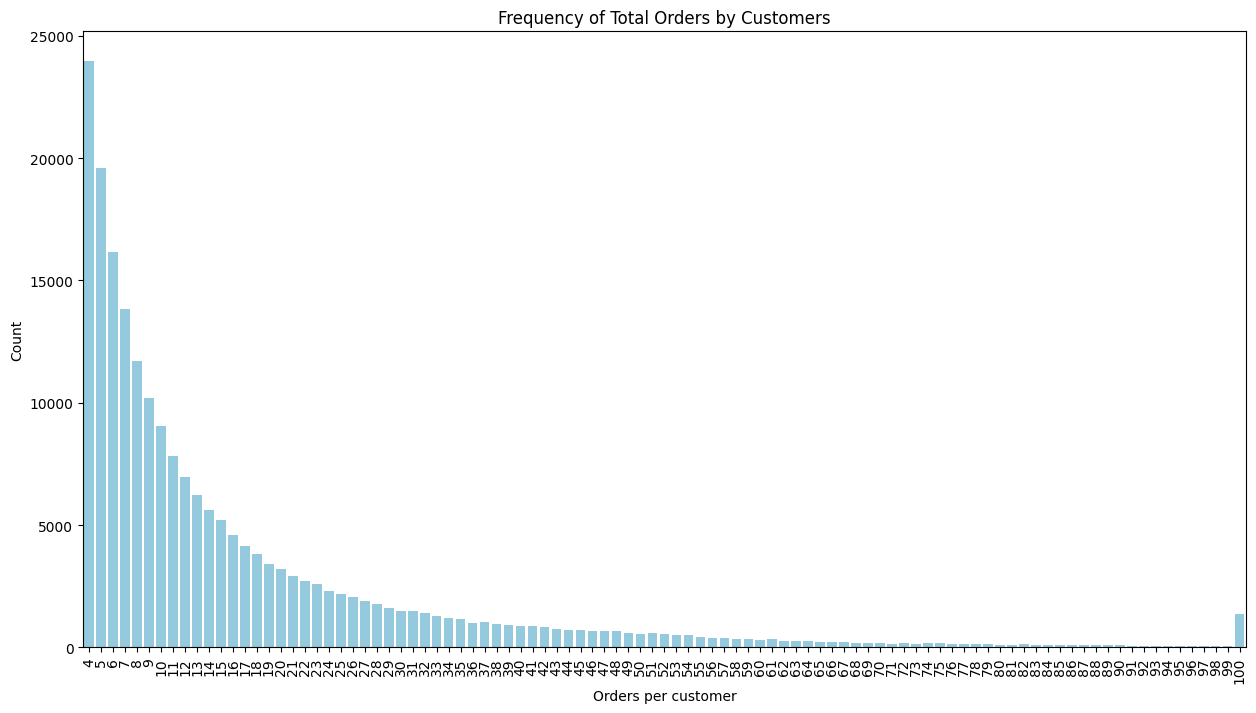

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=order_number.index, y=order_number.values, color='skyblue', ax=ax)
ax.set_xlabel('Orders per customer')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Frequency of Total Orders by Customers')


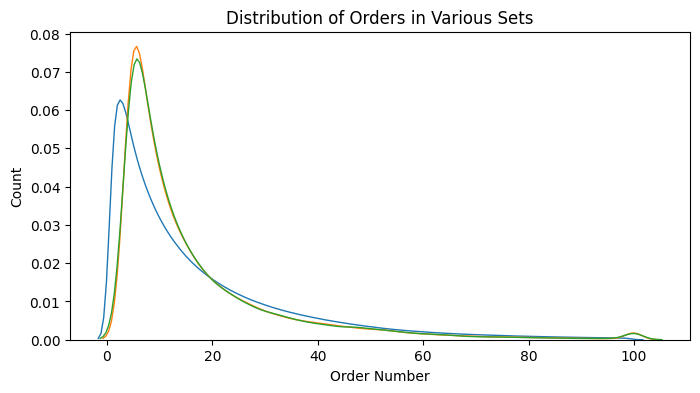

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 1)
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Distribution of Orders in Various Sets')
plt.show()

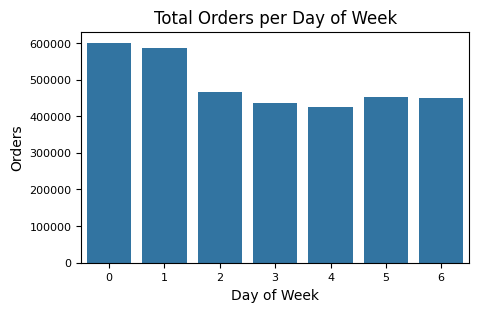

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

order_counts = orders['order_dow'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(x=order_counts.index, y=order_counts.values, ax=ax)
ax.set_xlabel('Day of Week', size=10)
ax.set_ylabel('Orders', size=10)
ax.tick_params(axis='both', labelsize=8)
ax.set_title('Total Orders per Day of Week')
plt.show()


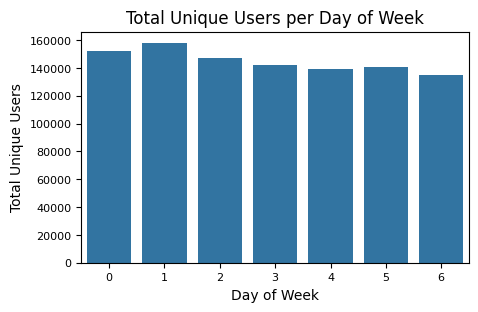

In [ ]:
temp_df = orders.groupby('order_dow')['user_id'].nunique()

fig, ax = plt.subplots(figsize = (5,3))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Total Unique Users', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Unique Users per Day of Week')
plt.show()


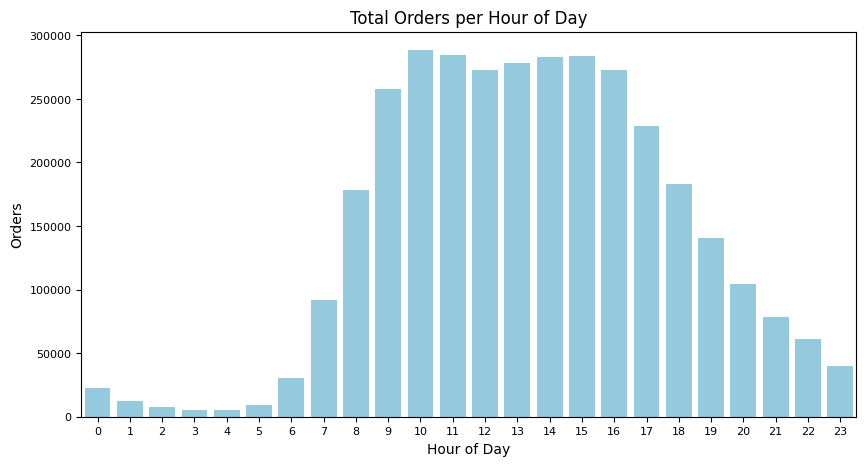

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='order_hour_of_day', data=orders, color='skyblue', ax=ax)
ax.set_xlabel('Hour of Day', size=10)
ax.set_ylabel('Orders', size=10)
ax.tick_params(axis='both', labelsize=8)
ax.set_title('Total Orders per Hour of Day')
plt.show()


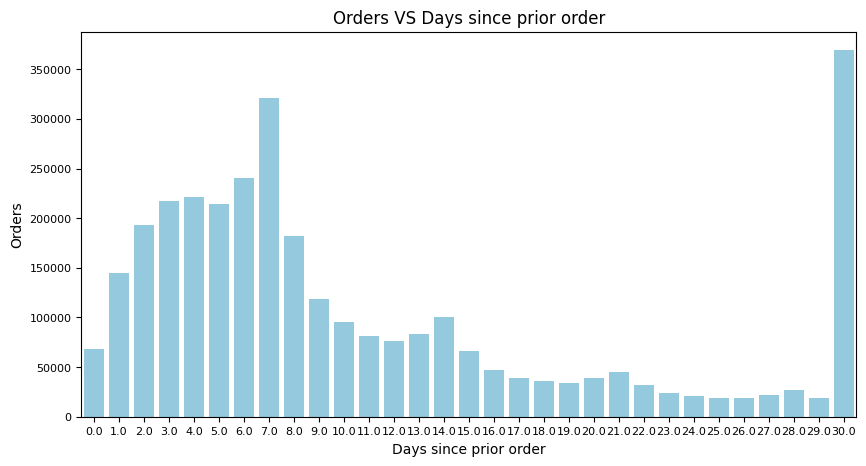

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='days_since_prior_order', data=orders, color='skyblue', ax=ax)
ax.set_xlabel('Days since prior order', size=10)
ax.set_ylabel('Orders', size=10)
ax.tick_params(axis='both', labelsize=8)
ax.set_title('Orders VS Days since prior order')
plt.show()


In [ ]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].count().reset_index()
temp_df = temp_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')
temp_df.head()


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


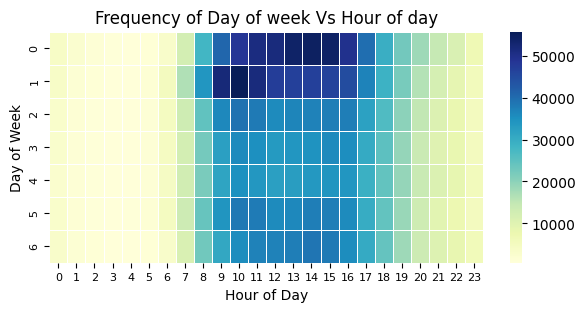

In [ ]:
ax = plt.subplots(figsize=(7,3))
ax = sns.heatmap(temp_df, cmap="YlGnBu", linewidths=.5)
ax.set_title("Frequency of Day of week Vs Hour of day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
fig.savefig("Frequency of Day of week Vs Hour of day.png")
plt.show()

In [ ]:
prior.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [ ]:
len(prior.order_id.unique())

3214874

In [ ]:
len(prior.product_id.unique())

49677

In [ ]:
add_to_cart_order_prior = prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_prior = add_to_cart_order_prior.value_counts()

In [ ]:
add_to_cart_order_prior.head()

,count
add_to_cart_order,
5,228330
6,227675
4,222081
7,220006
3,207027


In [ ]:
add_to_cart_order_prior.index.max()

145

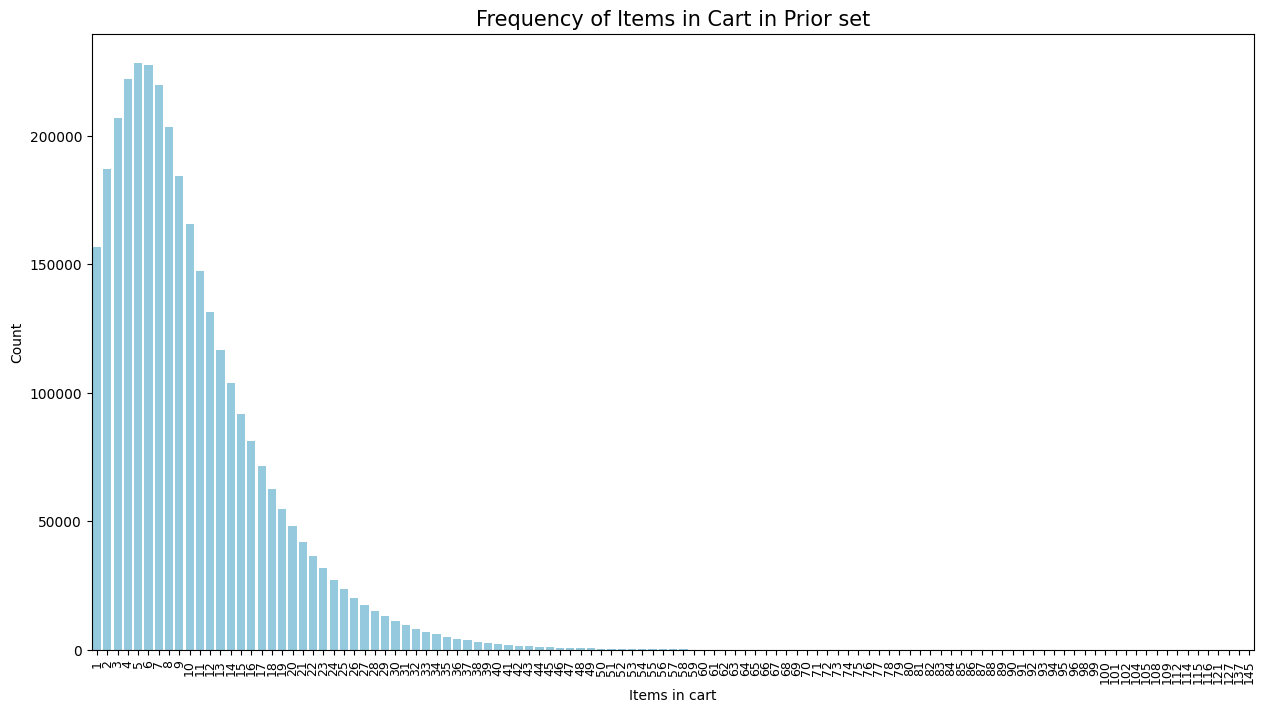

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=add_to_cart_order_prior.index, y=add_to_cart_order_prior.values, color='skyblue', ax=ax)
ax.set_xlabel('Items in cart')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize=9)
ax.set_title('Frequency of Items in Cart in Prior set', size=15)
fig.savefig('Frequency of Items in Cart in Prior set.png')
plt.show()


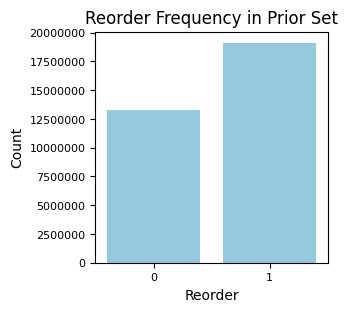

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(
    x=prior.reordered.value_counts().index,
    y=prior.reordered.value_counts().values,
    color='skyblue',
    ax=ax
)
ax.set_xlabel('Reorder', size=10)
ax.set_ylabel('Count', size=10)
ax.tick_params(axis='both', labelsize=8)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Reorder Frequency in Prior Set')
plt.show()


In [ ]:
print('Percentage of reorder in prior set:',
      format(prior[prior.reordered == 1].shape[0]*100/prior.shape[0], '.2f'))

Percentage of reorder in prior set: 58.97


In [ ]:
train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [ ]:
len(train.order_id.unique())

131209

In [ ]:
len(train.product_id.unique())

39123

In [ ]:
add_to_cart_order_train = train.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_train = add_to_cart_order_train.value_counts()

In [ ]:
add_to_cart_order_train.head()

,count
add_to_cart_order,
5,8895
6,8708
7,8541
4,8218
3,8033


In [ ]:
add_to_cart_order_train.index.max()

80

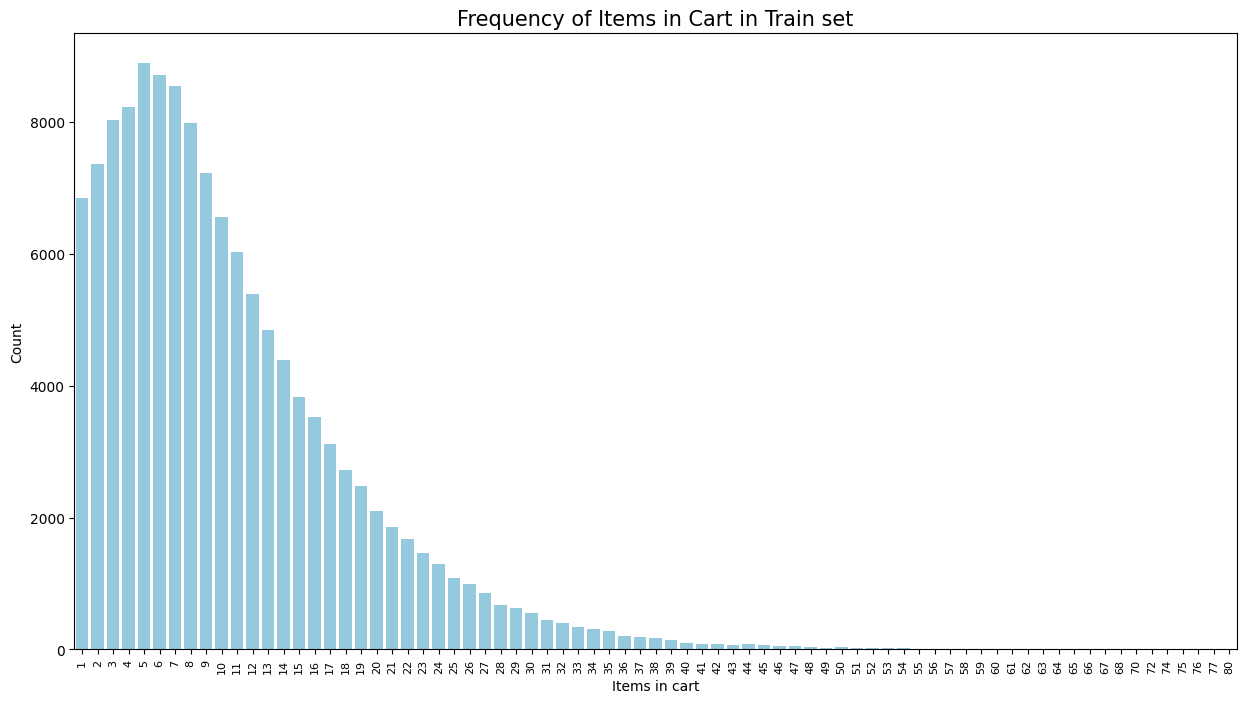

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=add_to_cart_order_train.index, y=add_to_cart_order_train.values, color='skyblue', ax=ax)
ax.set_xlabel('Items in cart')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize=8)
ax.set_title('Frequency of Items in Cart in Train set', size=15)
fig.savefig('Frequency of Items in Cart in Train set.png')
plt.show()


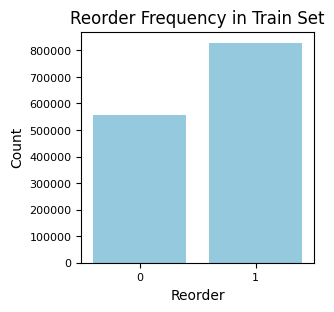

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(
    x=train.reordered.value_counts().index,
    y=train.reordered.value_counts().values,
    color='skyblue',
    ax=ax
)
ax.set_xlabel('Reorder', size=10)
ax.set_ylabel('Count', size=10)
ax.tick_params(axis='both', labelsize=8)
ax.set_title('Reorder Frequency in Train Set')
fig.savefig('Reorder Frequency in Train Set.png')
plt.show()


In [ ]:
print('Percentage of reorder in train set:',
      format(train[train.reordered == 1].shape[0]*100/train.shape[0], '.2f'))

Percentage of reorder in train set: 59.86


In [ ]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [ ]:
len(products.product_name.unique())

49688

In [ ]:
len(products.aisle_id.unique())

134

In [ ]:
len(products.department_id.unique())

21

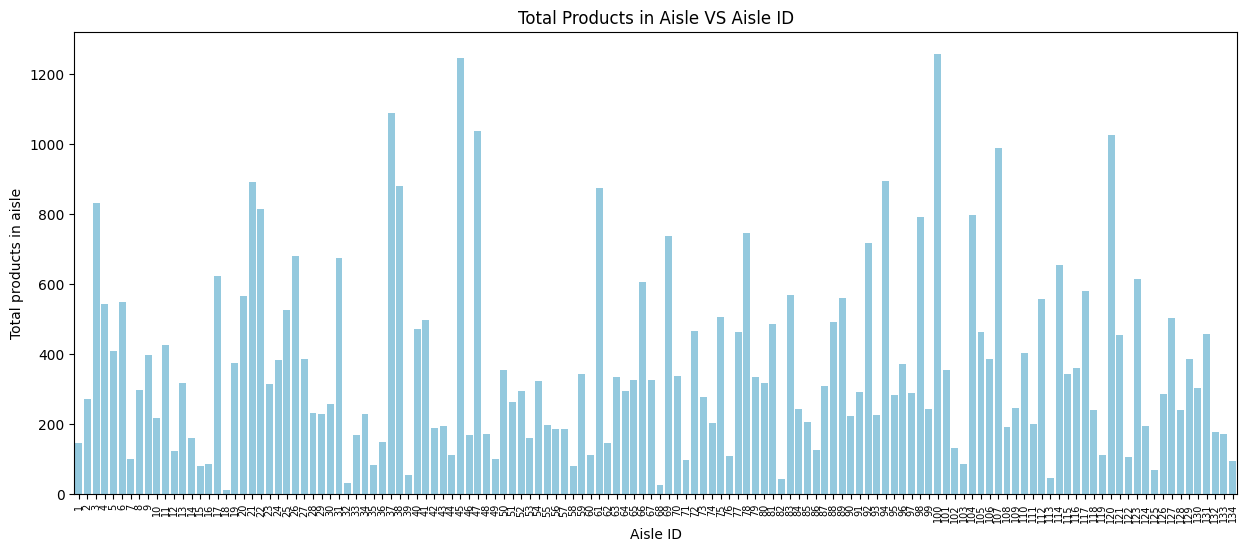

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

temp_df = products.groupby('aisle_id')['product_id'].count()

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=temp_df.index, y=temp_df.values, color='skyblue', ax=ax)
ax.set_xlabel('Aisle ID')
ax.set_ylabel('Total products in aisle')
ax.xaxis.set_tick_params(rotation=90, labelsize=7)
ax.set_title('Total Products in Aisle VS Aisle ID', size=12)
plt.show()


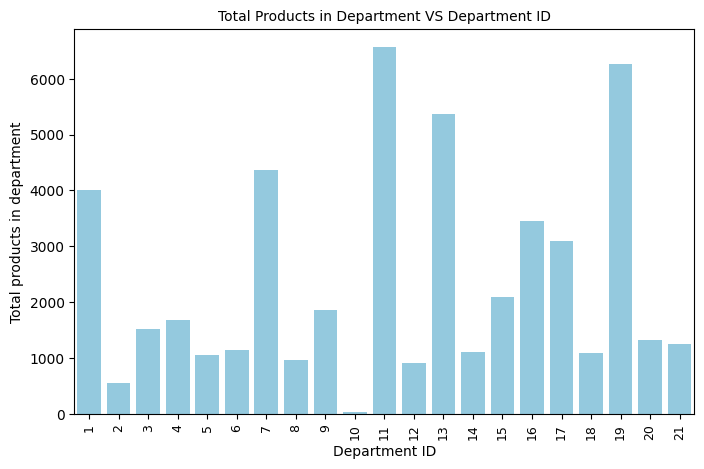

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

temp_df = products.groupby('department_id')['product_id'].count()

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=temp_df.index, y=temp_df.values, color='skyblue', ax=ax)
ax.set_xlabel('Department ID')
ax.set_ylabel('Total products in department')
ax.xaxis.set_tick_params(rotation=90, labelsize=9)
ax.set_title('Total Products in Department VS Department ID', size=10)
plt.show()


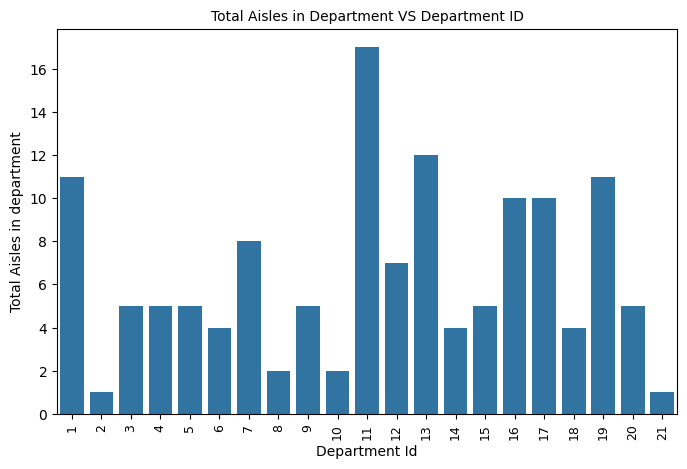

In [ ]:
temp_df = products.groupby('department_id')['aisle_id'].nunique()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Department Id')
ax.set_ylabel('Total Aisles in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Aisles in Department VS Department ID', size = 10)